In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
from statsmodels.tools.eval_measures import bic, aic

#### 1)
Naˇctˇete data ze soubor ̊u: simplreg.txt a fruitohms.txt. Vizualizujte z ́avislosti
Y = F(X) v prvn ́ım pˇr ́ıpadˇe a juice=F(ohms) ve druh ́em pˇr ́ıpadˇe pomoc ́ı
bodov ́eho grafu. Uloˇzte grafy jako soubor png ve dvou oknech (1 ˇr ́adek a 2
sloupce).

In [7]:
file_path = "./fruitohms.txt"

fruitohms = pd.read_csv(file_path, delimiter=' ', quotechar='"')
print(fruitohms)

     juice  ohms
1      4.0  4860
2      5.0  5860
3      5.5  6650
4      7.5  7050
5      8.5  5960
..     ...   ...
123   58.5  3650
124   58.5  3750
125   58.5  4550
126   59.5  3300
127   60.0  3600

[128 rows x 2 columns]


In [8]:
file_path = "./simplreg.txt"

simplreg = pd.read_csv(file_path, delimiter="\t")
print(simplreg)

     X      Y
0   25  350.0
1   30  348.4
2   35  337.0
3   40  330.8
4   45  315.8
5   50  305.4
6   55  280.7
7   60  248.0
8   65  230.4
9   70  202.3
10  75  162.5
11  80  126.0
12  85   74.6
13  90   28.6


In [9]:
x = simplreg["X"].values
x = np.array(x).reshape(-1, 1)
y = simplreg["Y"].values

ohms = fruitohms["ohms"].values
juice = fruitohms["juice"].values


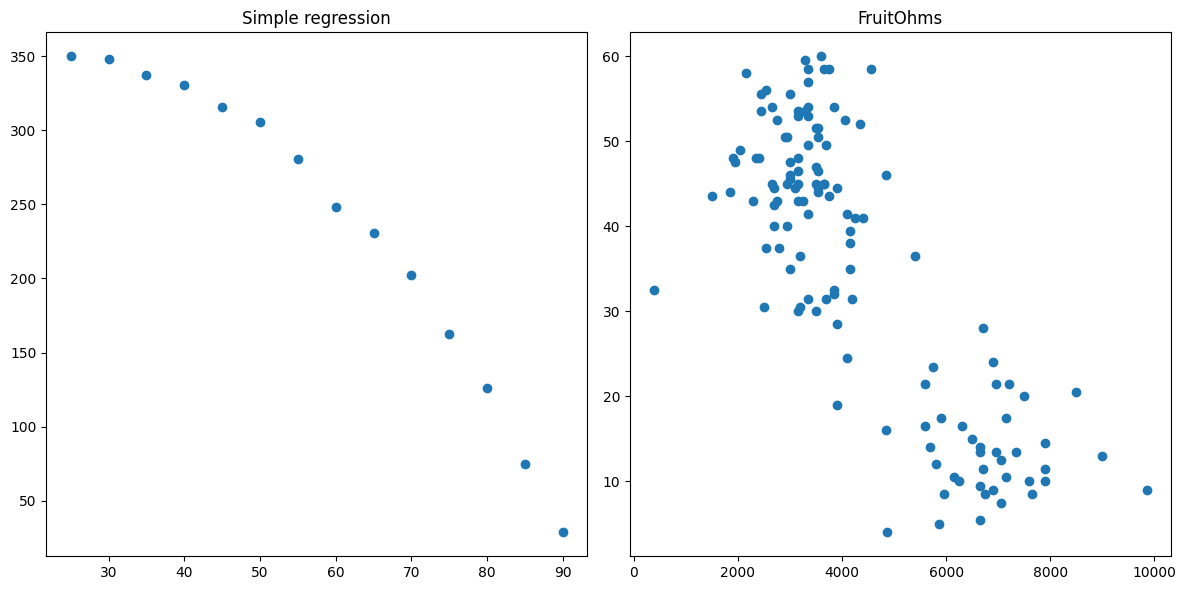

In [10]:
## ulozeni obou grafu do jednoho:

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(x, y)
axs[0].set_title("Simple regression")

axs[1].scatter(ohms, juice)
axs[1].set_title("FruitOhms")

plt.tight_layout()
plt.savefig("./Scatter_Simplreg_FruitOhms.png")
plt.show()


### 2)
Vytvoˇrte line ́arn ́ı jednoduch ́y a polynomi ́aln ́ı regresn ́ı model pro naˇcten ́a data.
Zvyˇste stupeˇn polynomu z 2 na .... Vypoˇc ́ıtejte krit ́eria kvality (R-Squared,
AIC, BIC) v kaˇzd ́em z pˇr ́ıpad ̊u. Vytvoˇrte 1 ˇr ́adkov ́y a 3 sloupcov ́y graf krit ́eri ́ı
kvality versus stupeˇn polynomu pro kaˇzd ́e z dat. Uloˇzte grafy jako soubory
png. Vyberte nejlepˇs ́ı modely pro kaˇzd ́e z  ́udaj ̊u z hlediska pouˇzit ́ych krit ́eri ́ı.

#### SimplReg

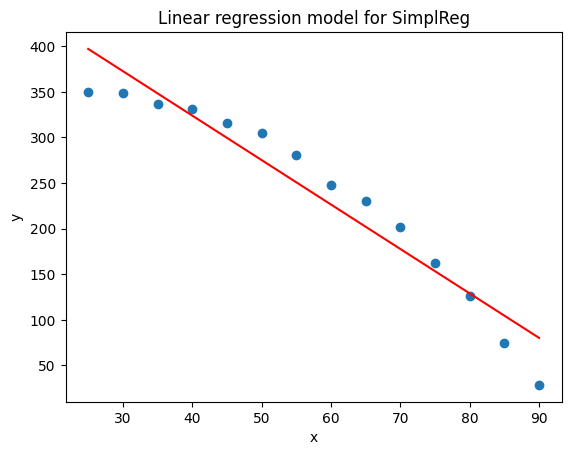

In [11]:
## LINEARNI REGRESNI MODEL

simpl_linreg = LinearRegression()
simpl_linreg.fit(x, y)
simpl_predict = simpl_linreg.predict(x)

plt.scatter(x, y)
plt.plot(x, simpl_predict, color="red")
plt.title("Linear regression model for SimplReg")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [12]:
mse_lin_simpl = mean_squared_error(y, simpl_predict)
rmse_lin_simpl = np.sqrt(mse_lin_simpl)
r2_lin_simpl = r2_score(y, simpl_predict)

model_lin_simpl = OLS(y, sm.add_constant(x)).fit()
aic_lin_simpl = model_lin_simpl.aic
bic_lin_simpl = model_lin_simpl.bic

print(f"Linear Regression MSE: {mse_lin_simpl}, RMSE: {rmse_lin_simpl}, R2: {r2_lin_simpl}, AIC: {aic_lin_simpl}, BIC: {bic_lin_simpl}")

print("Coefficients (Linear Regression):", simpl_linreg.coef_)
print("Intercept (Linear Regression):", simpl_linreg.intercept_)

Linear Regression MSE: 755.3804207221352, RMSE: 27.48418492009787, R2: 0.9274585166946575, AIC: 136.51137980171558, BIC: 137.7894944609461
Coefficients (Linear Regression): [-4.87573626]
Intercept (Linear Regression): 518.961978021978


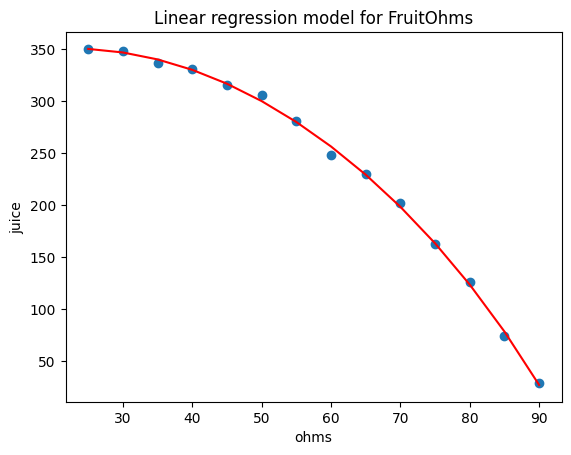

In [22]:
## POLYNOMIALNI REGRESNI MODEL
poly = PolynomialFeatures(degree=5)
simpl_poly = poly.fit_transform(x)

simpl_linreg = LinearRegression()
simpl_linreg.fit(simpl_poly, y)

simpl_poly_pred = simpl_linreg.predict(simpl_poly)

plt.scatter(x, y)
plt.plot(x, simpl_poly_pred, color="red")
plt.title("Linear regression model for FruitOhms")
plt.xlabel("ohms")
plt.ylabel("juice")
plt.show()

In [23]:

mse_poly_y = mean_squared_error(y, simpl_poly_pred)
rmse_poly_y = np.sqrt(mse_poly_y)
r2_poly_y = r2_score(y, simpl_predict)

model_poly_y = OLS(y, sm.add_constant(x)).fit()
aic_poly_y = model_poly_y.aic
bic_poly_y = model_poly_y.bic

print(f"Polynomial Regression MSE: {mse_poly_y}, RMSE: {rmse_poly_y}, R2: {r2_poly_y}, AIC: {aic_poly_y}, BIC: {bic_poly_y}")

print("Coefficients (Polynomial Regression):", model_poly_y.params)
print("Intercept (Polynomial Regression):", model_poly_y.params[0])

Polynomial Regression MSE: 11.001634592740421, RMSE: 3.316871205328965, R2: 0.9274585166946575, AIC: 136.51137980171558, BIC: 137.7894944609461
Coefficients (Polynomial Regression): [518.96197802  -4.87573626]
Intercept (Polynomial Regression): 518.961978021978


#### FruitOhm


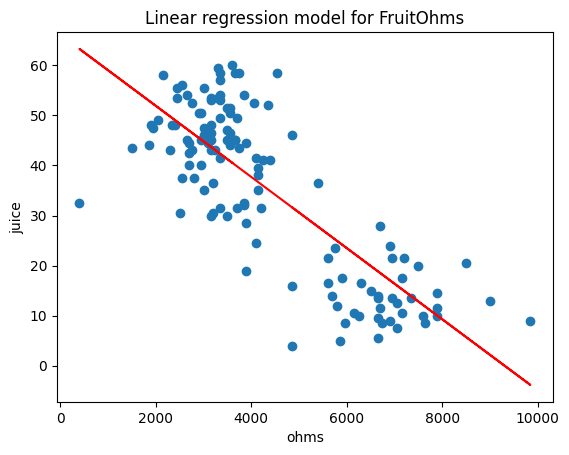

In [13]:
## LINEARNI REGRESNI MODEL

fruit_linreg = LinearRegression()
ohms = np.array(ohms).reshape(-1, 1)
fruit_linreg.fit(ohms, juice)
fruit_predict = fruit_linreg.predict(ohms)

plt.scatter(ohms, juice)
plt.plot(ohms, fruit_predict, color="red")
plt.title("Linear regression model for FruitOhms")
plt.xlabel("ohms")
plt.ylabel("juice")
plt.show()

In [14]:
mse_lin_fruit = mean_squared_error(juice, fruit_predict)
rmse_lin_fruit = np.sqrt(mse_lin_fruit)
r2_lin_fruit = r2_score(juice, fruit_predict)

model_lin_fruit = OLS(juice, sm.add_constant(ohms)).fit()
aic_lin_fruit = model_lin_fruit.aic
bic_lin_fruit = model_lin_fruit.bic

print(f"Linear Regression MSE: {mse_lin_fruit}, RMSE: {rmse_lin_fruit}, R2: {r2_lin_fruit}, AIC: {aic_lin_fruit}, BIC: {bic_lin_fruit}")

print("Coefficients (Linear Regression):", fruit_linreg.coef_)
print("Intercept (Linear Regression):", fruit_linreg.intercept_)

Linear Regression MSE: 98.03629419350503, RMSE: 9.901327900514406, R2: 0.6387088534001171, AIC: 954.1714976551683, BIC: 959.8755581830076
Coefficients (Linear Regression): [-0.00710644]
Intercept (Linear Regression): 66.13641575923336


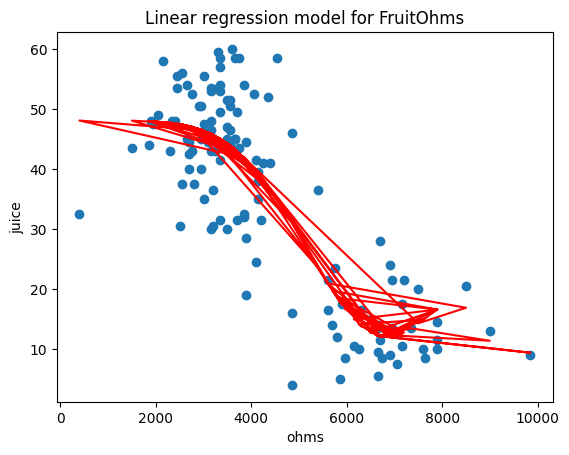

In [18]:
## POLYNOMIALNI REGRESNI MODEL
poly = PolynomialFeatures(degree=10)
fruit_poly = poly.fit_transform(ohms)

fruit_poly_reg = LinearRegression()
fruit_poly_reg.fit(fruit_poly, juice)

fruit_predict_poly = fruit_poly_reg.predict(fruit_poly)

plt.scatter(ohms, juice)
plt.plot(ohms, fruit_predict_poly, color="red")
plt.title("Linear regression model for FruitOhms")
plt.xlabel("ohms")
plt.ylabel("juice")
plt.show()

In [58]:
mse_poly_fruit = mean_squared_error(juice, fruit_predict_poly)
rmse_poly_fruit = np.sqrt(mse_poly_fruit)
r2_poly_fruit = r2_score(juice, fruit_predict)

model_poly_fruit = OLS(juice, sm.add_constant(ohms)).fit()
aic_poly_fruit = model_poly_fruit.aic
bic_poly_fruit = model_poly_fruit.bic

print(f"Polynomial Regression MSE: {mse_poly_fruit}, RMSE: {rmse_poly_fruit}, R2: {r2_poly_fruit}, AIC: {aic_poly_fruit}, BIC: {bic_poly_fruit}")

print("Coefficients (Polynomial Regression):", fruit_poly_reg.coef_)
print("Intercept (Polynomial Regression):", fruit_poly_reg.intercept_)


Polynomial Regression MSE: 97.79650993571755, RMSE: 9.88921179547276, R2: 0.6387088534001171, AIC: 954.1714976551683, BIC: 959.8755581830076
Coefficients (Polynomial Regression): [ 0.00000000e+00 -5.74148081e-03 -1.35211092e-07]
Intercept (Polynomial Regression): 63.2195332485621
